## Exploring Local Bellingham Data
<img src='https://lh6.googleusercontent.com/UHshYojOhacUhSHG0M_HiXFqQ7U0bNPu7myyNXFxHuvrwmLW2hPeQNev4RIKtK1RzC6bJIQuCcfsvtxHCU43lwExj83ZeT94MyxNJq2X8upGx9qfFTs=w1280' width="300" align="right">
Here we will download data from a recently installed wind sensor on the LeHigh cement pier in Bellingham Bay. The instrument was installed by myself and USGS crew to provide inputs to our wave model validation in the Bay. The scripts below download the last 2-days of data from the instrumnet and plot them 


In [0]:
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [12]:
# Download Bellingham Wind Sensor Data (https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.graph)

# Download all data
# url = 'https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.csv?time%2Cboardtemp%2CDm%2CSm%2CPa%2CTa%2CUa%2CRc' 

# Download just last 10-days
now = datetime.datetime.utcnow()-datetime.timedelta(days=100)
timestr = 'time%3E={:d}-{:02d}-{:02d}T{:02d}%3A00%3A00Z'.format(now.year,now.month,now.day,now.hour)
url = 'https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.csv?time%2Cboardtemp%2CDm%2CSm%2CPa%2CTa%2CUa%2CRc&' + timestr
df = pd.read_csv(url)
print(url)

https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.csv?time%2Cboardtemp%2CDm%2CSm%2CPa%2CTa%2CUa%2CRc&time%3E=2020-02-18T17%3A00%3A00Z


In [13]:
# See what's inside (the most recent observations)
df.tail()

,time,boardtemp,Dm,Sm,Pa,Ta,Ua,Rc
4088,2020-05-28T15:00:00Z,17.5,9,2.3,1017.3,14.4,63.2,100.54
4089,2020-05-28T15:15:00Z,18.0,23,1.6,1017.3,14.9,64.3,100.54
4090,2020-05-28T15:30:00Z,18.75,169,1.7,1017.3,14.9,67.9,100.54
4091,2020-05-28T15:45:00Z,18.75,188,1.3,1017.3,14.4,73.9,100.54
4092,2020-05-28T16:00:00Z,19.5,194,1.2,1017.1,15.0,66.9,100.54


In [14]:
df.head()

,time,boardtemp,Dm,Sm,Pa,Ta,Ua,Rc
0,UTC,degree_C,degree,m s-1,Pa,degree_C,percent,mm
1,2020-04-15T21:45:00Z,23.75,292,10.1,1023.6,14.1,50.3,0.14
2,2020-04-15T22:00:00Z,24.5,295,9.7,1023.4,14.5,49.8,0.17
3,2020-04-15T22:15:00Z,23.0,301,10.5,1023.1,14.8,49.0,0.17
4,2020-04-15T22:30:00Z,24.25,305,9.3,1022.9,14.8,54.7,0.17


In [0]:
# we need to drop the first row, it's the units. (I )
df = df.drop(0)

In [0]:
# Now let's use th time as the index, this will making plotting easier
df.set_index('time',inplace=True)
# We also need to tell pandas that this time stamp is a datetime
df.index = pd.to_datetime(df.index)
# Now let's convert from GMT (UTC) time to local time
df.index = df.index - datetime.timedelta(hours=7)
# Lastly, we need to tell python that all the data in df is floating point numbers
df = df.astype(float)

In [0]:
# Estimate some SI units
df['SmI'] = df['Sm']*2.23694
df['TaI'] = df['Ta']*9/5+32

(737530.6145833334, 737573.375)

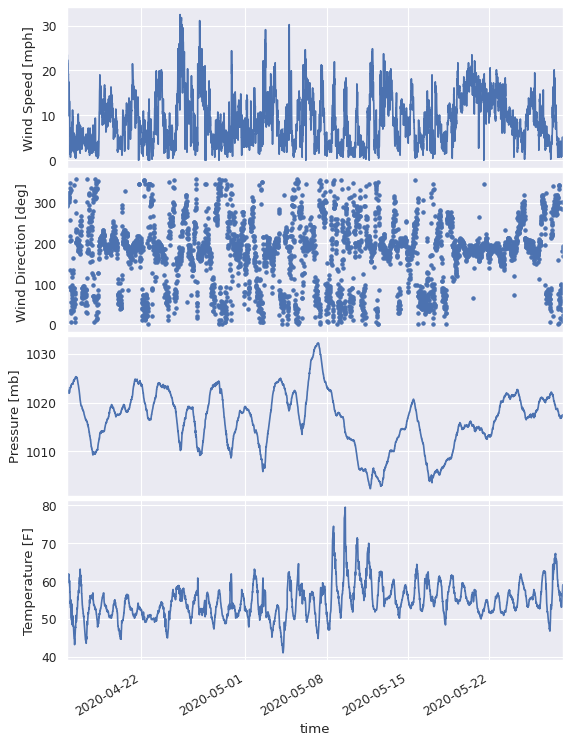

In [18]:
# Plot
f = plt.figure(num=None, figsize=(8,12), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2, ax3, ax4) = f.subplots(4, 1, sharex=True)

plt.sca(ax1)
df['SmI'].plot()
plt.ylabel('Wind Speed [mph]')
plt.sca(ax2)
df['Dm'].plot(linestyle='none',marker='.')
plt.ylabel('Wind Direction [deg]')
plt.sca(ax3)
df['Pa'].plot()
plt.ylabel('Pressure [mb]')
plt.sca(ax4)
df['TaI'].plot()
plt.ylabel('Temperature [F]')
#plt.xticks(rotation=30)
plt.subplots_adjust(wspace=0.025, hspace=0.025)
plt.xlim((df.index[0],df.index[-1]))

In [19]:
#from google.colab import drive
#drive.mount('/content/drive')
#cd '/content/drive/My Drive/Colab Notebooks'
#plt.savefig('BellinghamMet.png')
df.describe()

,boardtemp,Dm,Sm,Pa,Ta,Ua,Rc,SmI,TaI
count,4092.000000,4092.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,17.035802,176.929619,3.992520,1016.560645,12.600513,70.465754,52.120714,8.931028,54.680924
std,5.325663,80.272275,2.456969,5.903718,2.552295,11.665231,33.550300,5.496092,4.594130
min,6.000000,0.000000,0.000000,1002.400000,5.000000,22.400000,0.140000,0.000000,41.000000
25%,13.000000,134.000000,1.900000,1012.900000,11.000000,64.500000,18.290000,4.250186,51.800000
50%,16.000000,188.000000,3.600000,1017.300000,12.300000,72.000000,55.960000,8.052984,54.140000
75%,20.250000,219.000000,5.700000,1020.900000,14.000000,78.200000,89.580000,12.750558,57.200000
max,35.000000,359.000000,14.500000,1032.200000,26.400000,93.200000,100.540000,32.435630,79.520000


In [20]:
df.tail()

,boardtemp,Dm,Sm,Pa,Ta,Ua,Rc,SmI,TaI
time,,,,,,,,,
2020-05-28 08:00:00+00:00,17.50,9.0,2.3,1017.3,14.4,63.2,100.54,5.144962,57.92
2020-05-28 08:15:00+00:00,18.00,23.0,1.6,1017.3,14.9,64.3,100.54,3.579104,58.82
2020-05-28 08:30:00+00:00,18.75,169.0,1.7,1017.3,14.9,67.9,100.54,3.802798,58.82
2020-05-28 08:45:00+00:00,18.75,188.0,1.3,1017.3,14.4,73.9,100.54,2.908022,57.92
2020-05-28 09:00:00+00:00,19.50,194.0,1.2,1017.1,15.0,66.9,100.54,2.684328,59.00
